In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import time

# Credit card
#### Data loading

In [3]:
data = pd.read_csv('E5-Credit-Card-Users.csv')
print(data.head())
print(data.info())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

#### Basic scatter plot to see the distrubution of the features

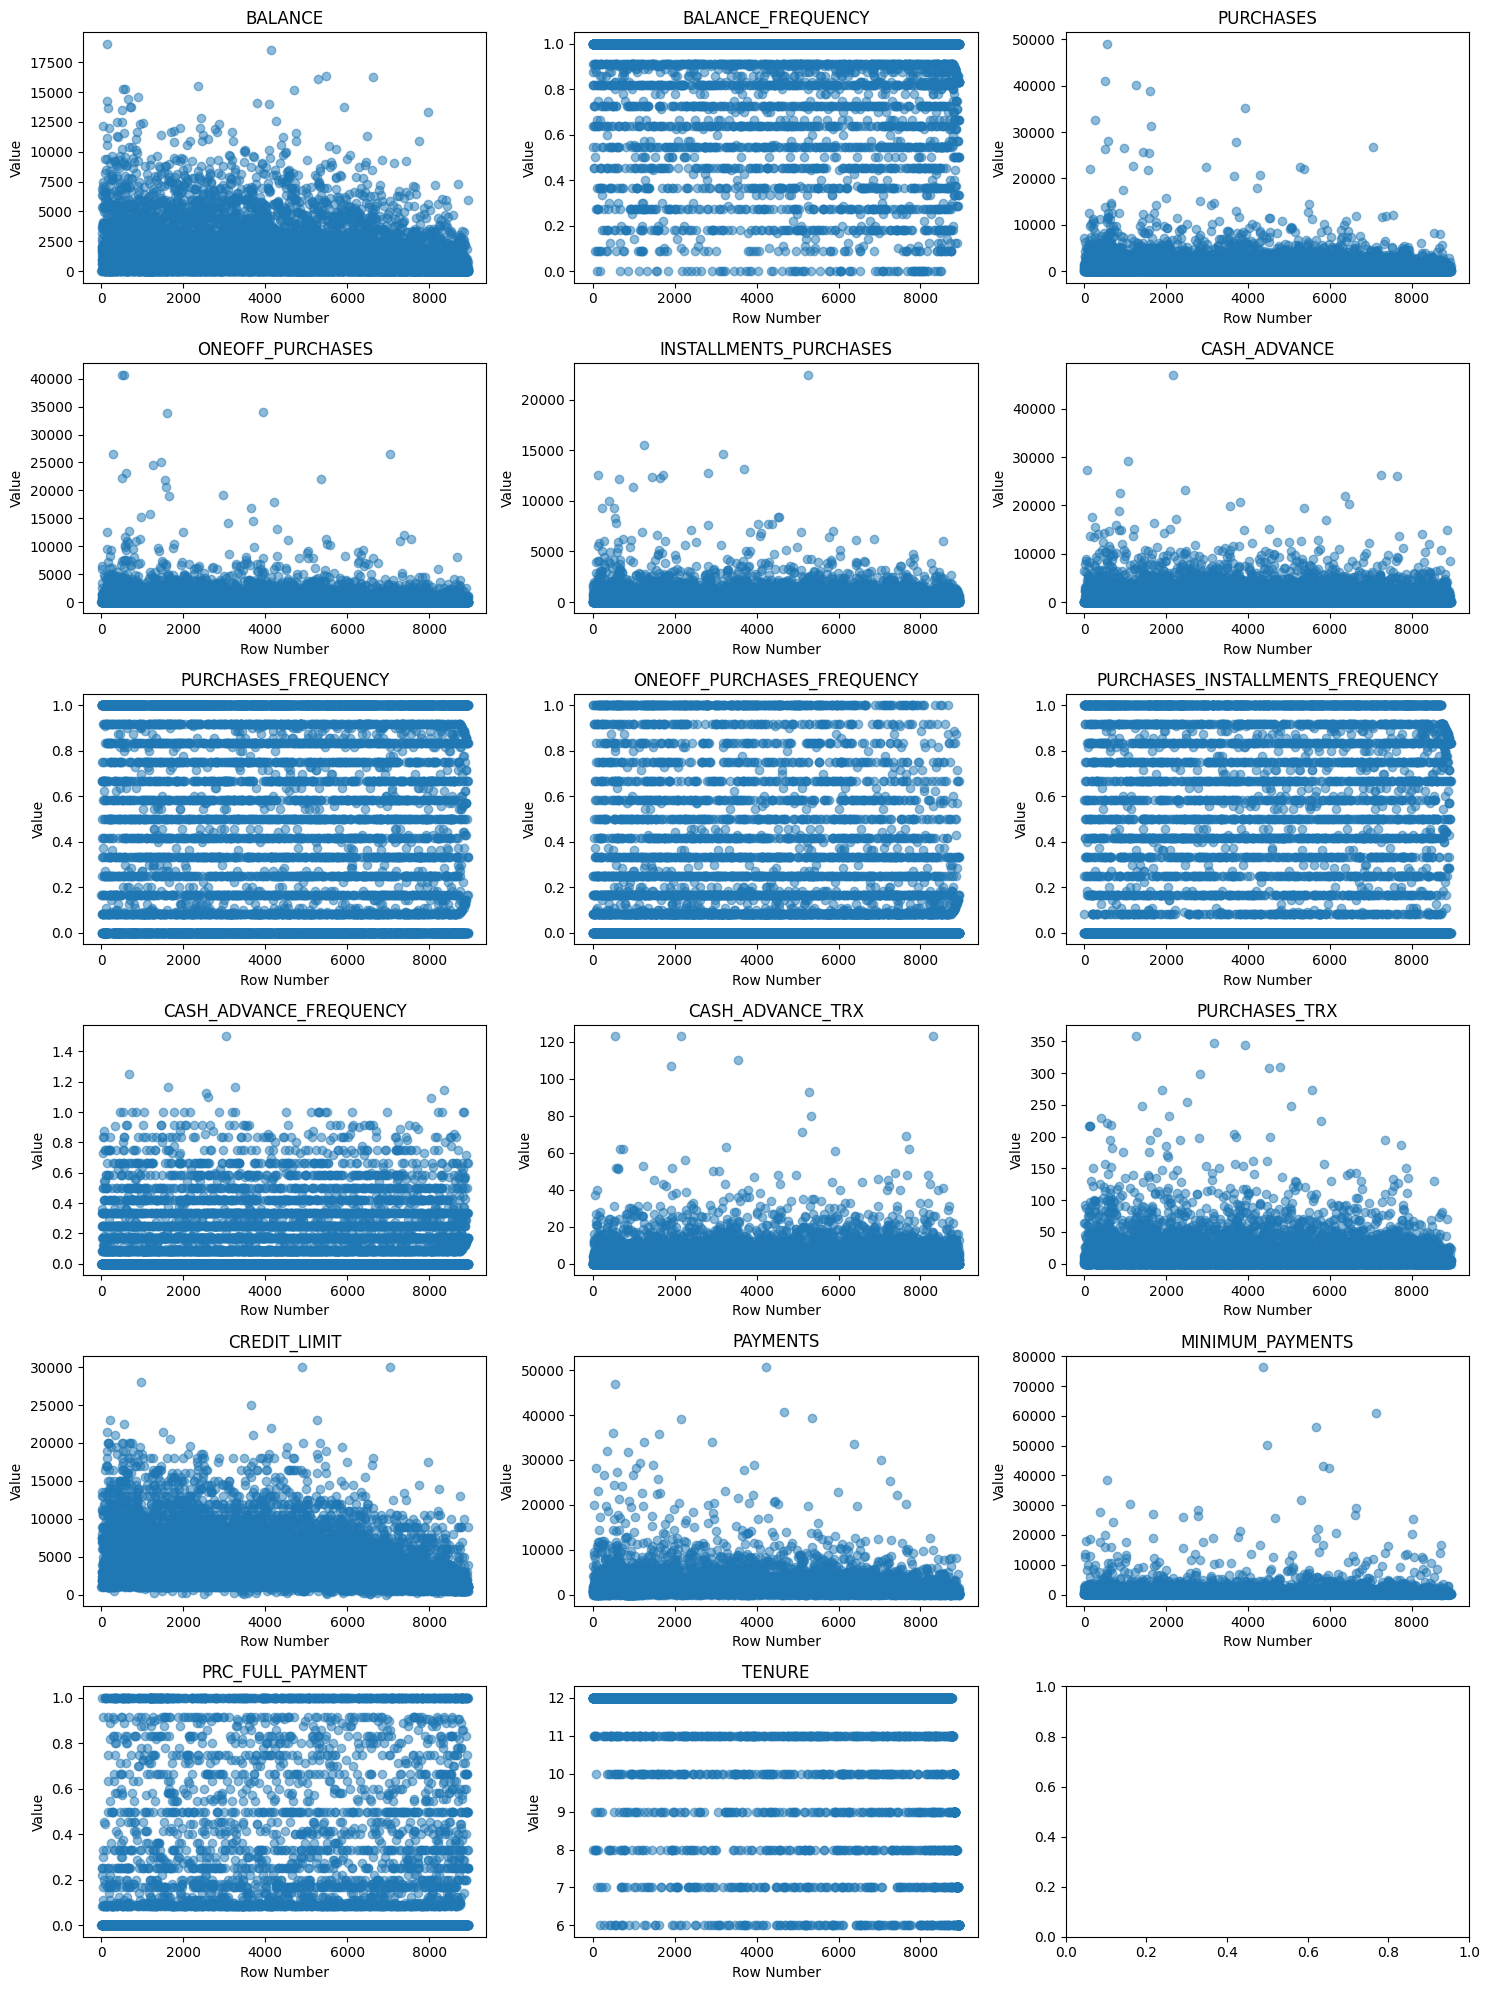

In [4]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(data.columns[1:]):
    axes[i].scatter(data.index, data[col], alpha=0.5)
    axes[i].set_title(col)
    axes[i].set_xlabel('Row Number')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

#### Checking on the missing values

In [5]:
missing_percent = data.isnull().mean() * 100
missing_values = data.isnull().sum()

print("Missing Values (%):")
print(missing_percent)

print("\nNumber of Missing Values:")
print(missing_values)

Missing Values (%):
CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Number of Missing Values:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASE

Since the two features that contain missing value have  scatter polt conentrated at a certain area it could be go to use mean to fill them

In [6]:
data.fillna(data.drop(columns=['CUST_ID']).mean(), inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Selection of 5 features with highest varaince

In [7]:
variances = data.drop(columns=['CUST_ID']).var()
print("Feature Variances:")
print(variances.sort_values(ascending=False))

top5_features = variances.sort_values(ascending=False).head(5).index.tolist()
print("Top 5 features based on variance:", top5_features)

data_selected = data[top5_features]

Feature Variances:
CREDIT_LIMIT                        1.323950e+07
PAYMENTS                            8.381394e+06
MINIMUM_PAYMENTS                    5.431641e+06
PURCHASES                           4.565208e+06
CASH_ADVANCE                        4.398096e+06
BALANCE                             4.332775e+06
ONEOFF_PURCHASES                    2.755228e+06
INSTALLMENTS_PURCHASES              8.178274e+05
PURCHASES_TRX                       6.179027e+02
CASH_ADVANCE_TRX                    4.657580e+01
TENURE                              1.791129e+00
PURCHASES_FREQUENCY                 1.610985e-01
PURCHASES_INSTALLMENTS_FREQUENCY    1.579647e-01
ONEOFF_PURCHASES_FREQUENCY          8.900441e-02
PRC_FULL_PAYMENT                    8.555578e-02
BALANCE_FREQUENCY                   5.612351e-02
CASH_ADVANCE_FREQUENCY              4.004857e-02
dtype: float64
Top 5 features based on variance: ['CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PURCHASES', 'CASH_ADVANCE']


#### Standardization

   CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PURCHASES  CASH_ADVANCE
0     -0.960433 -0.528979     -3.109675e-01  -0.424900     -0.466786
1      0.688639  0.818642      8.931021e-02  -0.469552      2.605605
2      0.826062 -0.383805     -1.016632e-01  -0.107668     -0.466786
3      0.826062 -0.598688      4.878305e-17   0.232058     -0.368653
4     -0.905464 -0.364368     -2.657913e-01  -0.462063     -0.466786
Correlation Matrix of Selected Features:
                  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PURCHASES  \
CREDIT_LIMIT          1.000000  0.421852          0.125134   0.356959   
PAYMENTS              0.421852  1.000000          0.125046   0.603264   
MINIMUM_PAYMENTS      0.125134  0.125046          1.000000   0.093515   
PURCHASES             0.356959  0.603264          0.093515   1.000000   
CASH_ADVANCE          0.303983  0.453238          0.139223  -0.051474   

                  CASH_ADVANCE  
CREDIT_LIMIT          0.303983  
PAYMENTS              0.453238  
MINIMUM

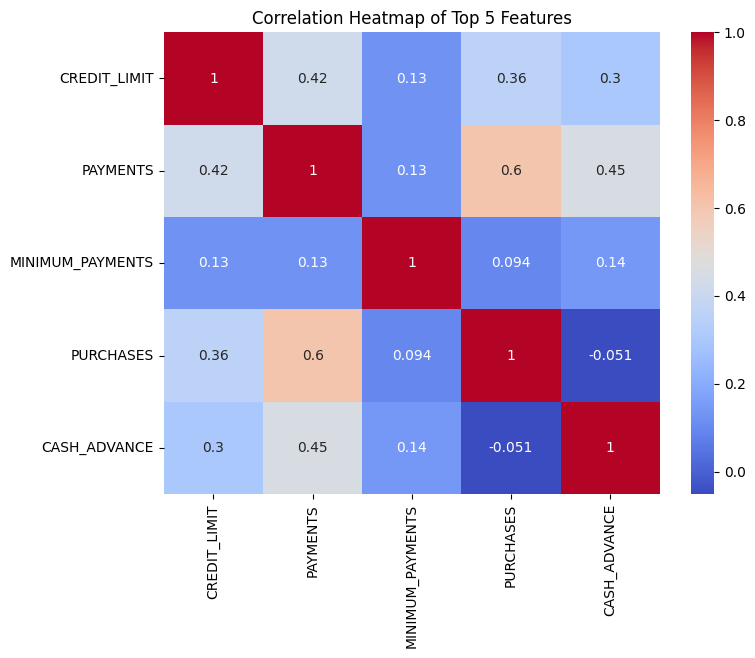

In [8]:
scaler = StandardScaler()
data_standardized_all = scaler.fit_transform(data.drop(columns=['CUST_ID']))
data_standardized_all = pd.DataFrame(data_standardized_all, columns=data.columns[1:])

data_standardized_selected = data_standardized_all[top5_features]
print(data_standardized_selected.head())

corr_matrix_selected = data_standardized_selected.corr()
print("Correlation Matrix of Selected Features:")
print(corr_matrix_selected)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Top 5 Features")
plt.show()


#### Elbow method

C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

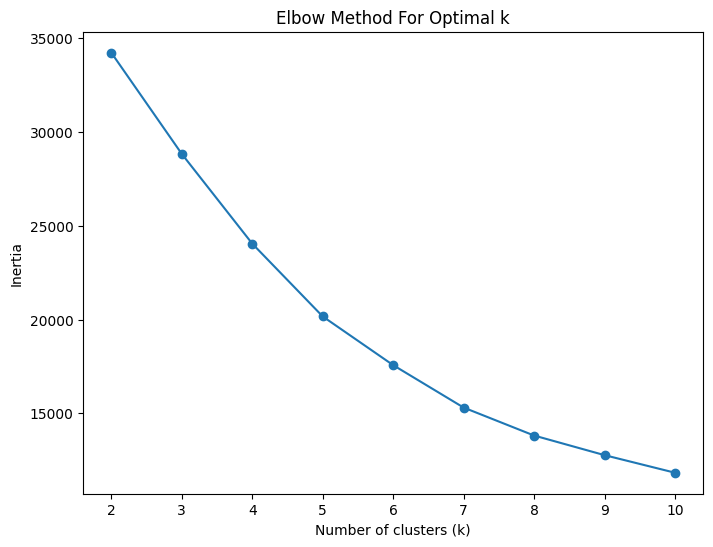

In [9]:
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_standardized_selected)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


#### K-means and PCA

C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Clustering Time: 0.08115696907043457
K-Means Silhouette Score: 0.468731620166256


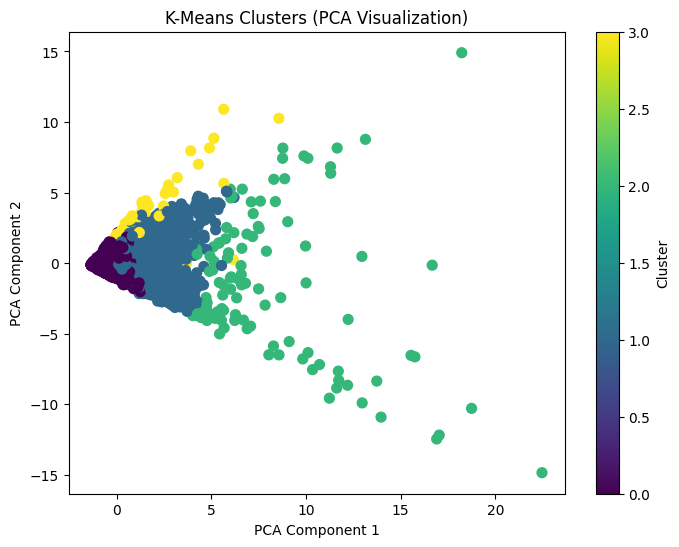

In [10]:
optimal_k = 4

start_time = time.time()
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_standardized_selected)
end_time = time.time()
print("K-Means Clustering Time:", end_time - start_time)

silhouette_kmeans = silhouette_score(data_standardized_selected, kmeans_labels)
print("K-Means Silhouette Score:", silhouette_kmeans)


pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_standardized_selected)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters (PCA Visualization)')
plt.colorbar(label='Cluster')
plt.show()


#### Hierarchical Clustering

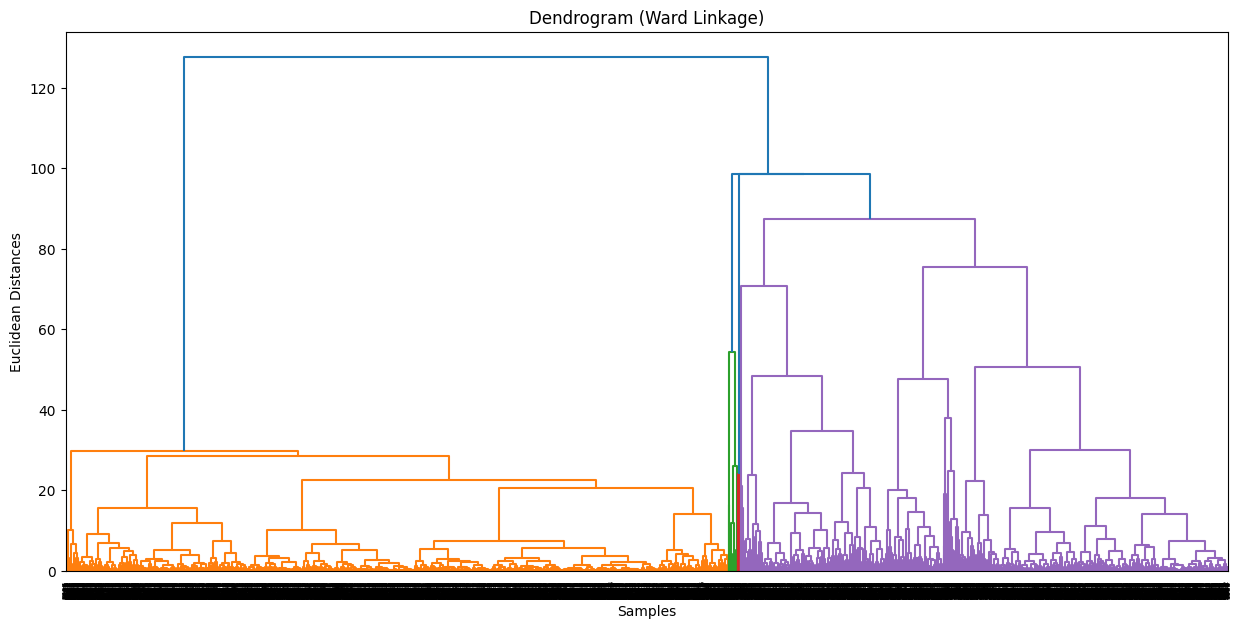

C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Hierarchical Clustering Time: 3.8508667945861816
Hierarchical Clustering Silhouette Score: 0.3446115820538284


In [11]:
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(data_standardized_selected, method='ward'))
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')
plt.show()

start_time = time.time()
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_standardized_selected)
end_time = time.time()
print("Hierarchical Clustering Time:", end_time - start_time)

silhouette_hierarchical = silhouette_score(data_standardized_selected, hierarchical_labels)
print("Hierarchical Clustering Silhouette Score:", silhouette_hierarchical)


#### DBSCAN Clustering

In [12]:
start_time = time.time()
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_standardized_selected)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_outliers = list(dbscan_labels).count(-1)
percent_outliers = n_outliers / len(dbscan_labels) * 100
end_time = time.time()
print("DBSCAN Clustering Time:", end_time - start_time)

print("DBSCAN found", n_clusters_dbscan, "clusters")
print("Percentage of outliers:", percent_outliers, "%")

if n_clusters_dbscan > 1:
    mask = dbscan_labels != -1
    silhouette_dbscan = silhouette_score(data_standardized_selected[mask], dbscan_labels[mask])
    print("DBSCAN Silhouette Score (excluding outliers):", silhouette_dbscan)
else:
    print("Silhouette score cannot be computed for DBSCAN with less than 2 clusters.")


DBSCAN Clustering Time: 1.0038955211639404
DBSCAN found 11 clusters
Percentage of outliers: 9.307262569832401 %
DBSCAN Silhouette Score (excluding outliers): 0.3173265197088195


In [13]:
data_selected = data_standardized_selected.copy()  # create a copy to avoid modifying the original data
data_selected['cluster'] = kmeans_labels

# Compute the mean values for each feature grouped by the cluster labels
cluster_means = data_selected.groupby('cluster').mean()

# Print the computed means
print("Mean values for each feature by K-Means cluster:")
print(cluster_means)

Mean values for each feature by K-Means cluster:
         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PURCHASES  CASH_ADVANCE
cluster                                                                   
0           -0.436066 -0.279021         -0.140731  -0.194120     -0.260351
1            1.227290  0.538084          0.149288   0.336849      0.686210
2            2.214497  5.911589          0.692314   4.775042      2.159087
3           -0.077071 -0.046743          9.312960   0.008617     -0.026540


# Wholesale

In [14]:
datau = pd.read_csv('E5-UCI-Wholesale.csv')
print(datau.head())
print(datau.info())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

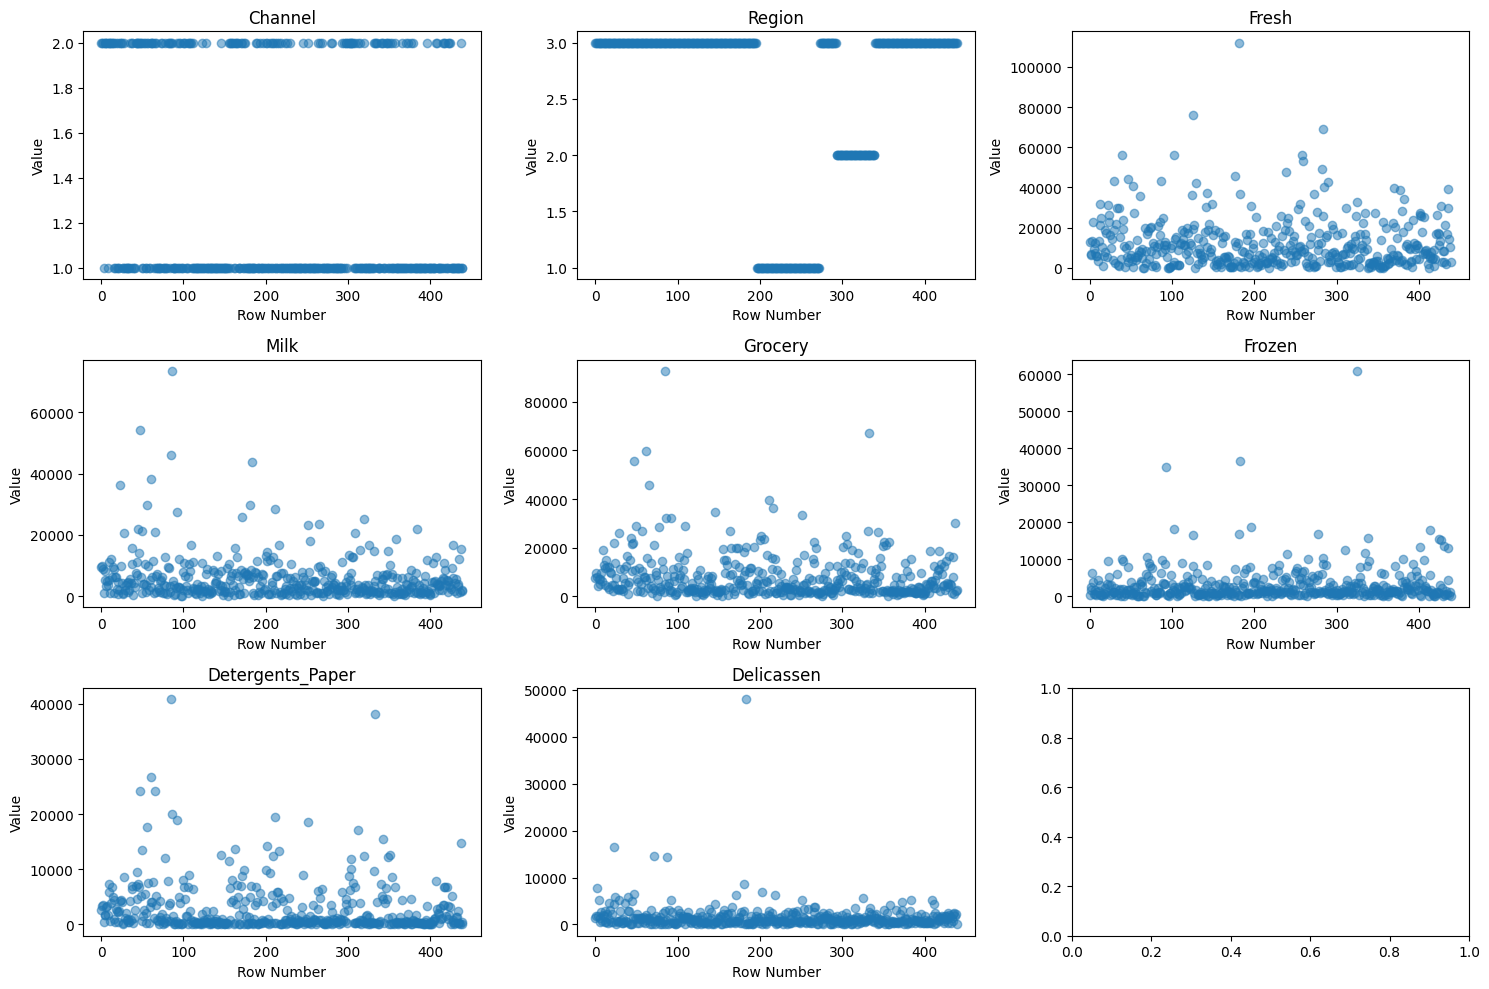

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(datau.columns[:]):
    axes[i].scatter(datau.index, datau[col], alpha=0.5)
    axes[i].set_title(col)
    axes[i].set_xlabel('Row Number')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [16]:
missing_percent = datau.isnull().mean() * 100
missing_values = datau.isnull().sum()

print("Missing Values (%):")
print(missing_percent)

print("\nNumber of Missing Values:")
print(missing_values)

Missing Values (%):
Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64

Number of Missing Values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [17]:
variances = datau.var()
print("Feature Variances:")
print(variances.sort_values(ascending=False))

top5_features = variances.sort_values(ascending=False).head(5).index.tolist()
print("Top 5 features based on variance:", top5_features)

datau_selected = datau[top5_features]

Feature Variances:
Fresh               1.599549e+08
Grocery             9.031010e+07
Milk                5.446997e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicassen          7.952997e+06
Region              5.994978e-01
Channel             2.190723e-01
dtype: float64
Top 5 features based on variance: ['Fresh', 'Grocery', 'Milk', 'Frozen', 'Detergents_Paper']


Correlation Matrix of Selected Features:
                     Fresh   Grocery      Milk    Frozen  Detergents_Paper
Fresh             1.000000 -0.011854  0.100510  0.345881         -0.101953
Grocery          -0.011854  1.000000  0.728335 -0.040193          0.924641
Milk              0.100510  0.728335  1.000000  0.123994          0.661816
Frozen            0.345881 -0.040193  0.123994  1.000000         -0.131525
Detergents_Paper -0.101953  0.924641  0.661816 -0.131525          1.000000


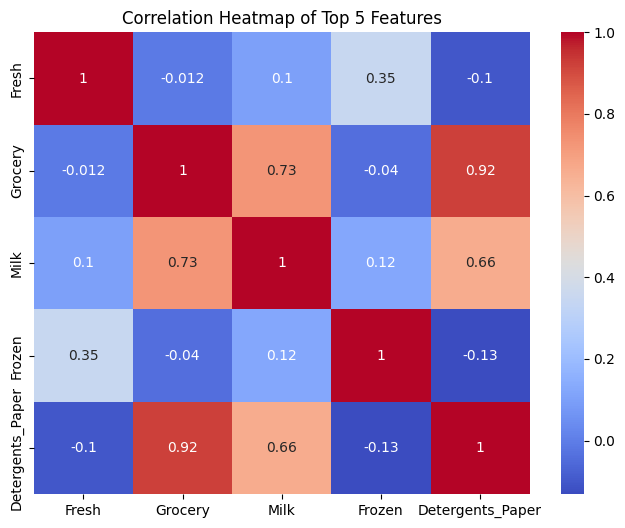

In [18]:
scaler = StandardScaler()
datau_standardized_all = scaler.fit_transform(datau.drop(columns=['Channel']))
datau_standardized_all = pd.DataFrame(datau_standardized_all, columns=datau.columns[1:])

datau_standardized_selected = datau_standardized_all[top5_features]

corru_matrix_selected = datau_standardized_selected.corr()
print("Correlation Matrix of Selected Features:")
print(corru_matrix_selected)

plt.figure(figsize=(8, 6))
sns.heatmap(corru_matrix_selected, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Top 5 Features")
plt.show()


C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

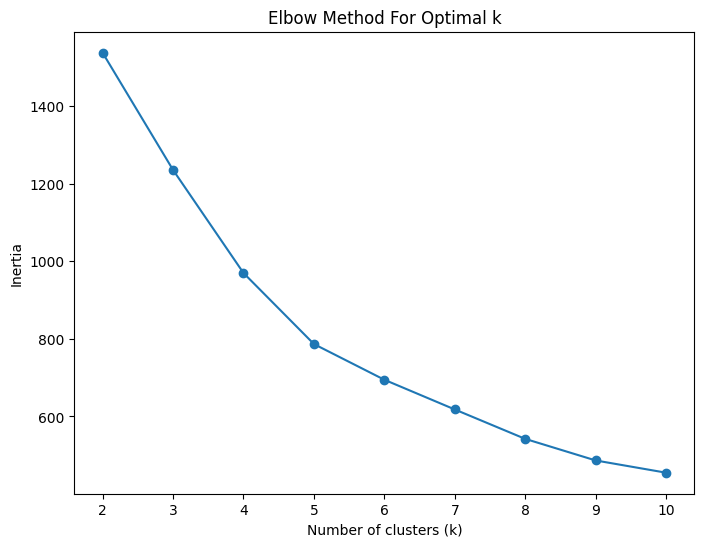

In [19]:
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datau_standardized_selected)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Clustering Time: 0.08354067802429199
K-Means Silhouette Score: 0.39710306793976685


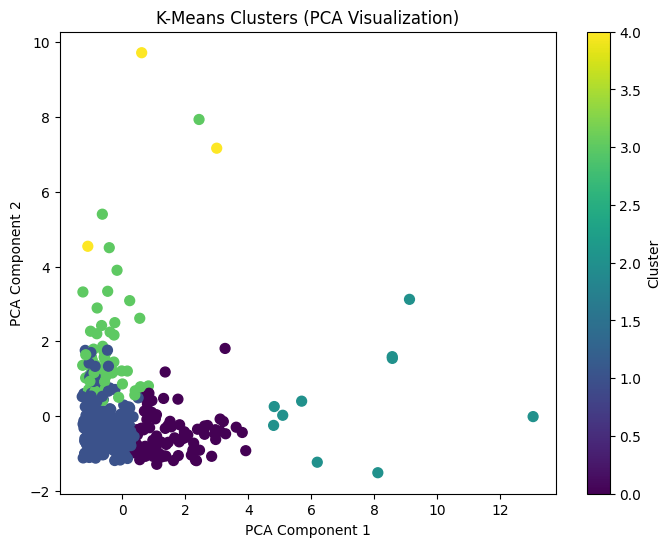

In [20]:
optimal_k = 5
start_time = time.time()
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(datau_standardized_selected)
end_time = time.time()
print("K-Means Clustering Time:", end_time - start_time)

silhouette_kmeans = silhouette_score(datau_standardized_selected, kmeans_labels)
print("K-Means Silhouette Score:", silhouette_kmeans)

pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(datau_standardized_selected)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters (PCA Visualization)')
plt.colorbar(label='Cluster')
plt.show()


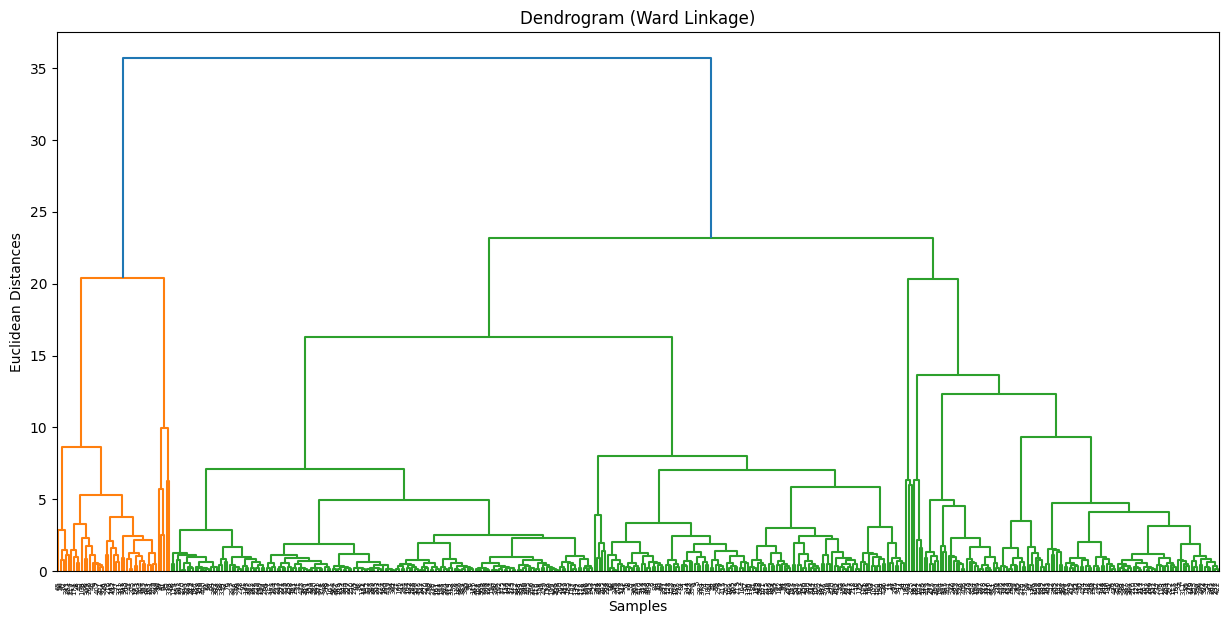

Hierarchical Clustering Time: 0.013421297073364258
Hierarchical Clustering Silhouette Score: 0.2144607845075221


C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [24]:
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(datau_standardized_selected, method='ward'))
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')
plt.show()
start_time = time.time()
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(datau_standardized_selected)
end_time = time.time()
print("Hierarchical Clustering Time:", end_time - start_time)

silhouette_hierarchical = silhouette_score(datau_standardized_all, hierarchical_labels)
print("Hierarchical Clustering Silhouette Score:", silhouette_hierarchical)

In [22]:
start_time = time.time()
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(datau_standardized_selected)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_outliers = list(dbscan_labels).count(-1)
percent_outliers = n_outliers / len(dbscan_labels) * 100
end_time = time.time()
print("DBSCAN Clustering Time:", end_time - start_time)

print("DBSCAN found", n_clusters_dbscan, "clusters")
print("Percentage of outliers:", percent_outliers, "%")

if n_clusters_dbscan > 1:
    mask = dbscan_labels != -1
    silhouette_dbscan = silhouette_score(datau_standardized_selected[mask], dbscan_labels[mask])
    print("DBSCAN Silhouette Score (excluding outliers):", silhouette_dbscan)
else:
    print("Silhouette score cannot be computed for DBSCAN with less than 2 clusters.")


DBSCAN Clustering Time: 0.005579710006713867
DBSCAN found 2 clusters
Percentage of outliers: 27.045454545454543 %
DBSCAN Silhouette Score (excluding outliers): 0.48484453182516524


In [23]:
data_selected = datau_standardized_selected.copy()  # make a copy to avoid modifying original data
data_selected['cluster'] = dbscan_labels

# Exclude outliers (which are labeled as -1)
clustered_data = data_selected[data_selected['cluster'] != -1]

# Calculate the mean values for each feature grouped by cluster
cluster_means = clustered_data.groupby('cluster').mean()

print("Mean values for each cluster (excluding outliers):")
print(cluster_means)

Mean values for each cluster (excluding outliers):
            Fresh   Grocery      Milk    Frozen  Detergents_Paper
cluster                                                          
0       -0.237663 -0.305082 -0.285236 -0.208437         -0.257709
1        2.302719 -0.511538 -0.496239 -0.389627         -0.449334
